# Markov Chains

In dit document gaan wij doormiddel van een Markov Chains de kansen berekenen van de toestand van een Flumph.

De Flumph op Planeet Seyst leeft in een van 3 toestanden (later 4), hongerig, tevreden of opgejaagd. Alle Flumphs beginnen met de zelfde kansen om in een van de 3 staten te komen. In welke staat een flumph morgen is hangt af van de kansen in welke staat hij nu is.

Om de kansberekening te maken beginnen wij met de algemene kansenmatrix. In deze matrix staan de kansen welke toestand een flumph krijgt afhankelijk van zijn huidig toestand.

De matrix is als volgt.

$
    \begin{bmatrix}
    0.8 & 0.1 &0.1 \\
    0.4 & 0.5 &0.1 \\
    0.6 & 0.2 & 0.2
    \end{bmatrix}
$

Wij gaan nu voor iedere dag het dot product nemen van de vorige dag en de algemene kansenmatrix. Dit geeft ons de kansmatrix voor die specifieke dag en dan kunnen wij de volgende dag berekenen.

## Flumph met 3 toestanden

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Eerst berekenen wij de kansen voor het aangegeven aantal dagen.

In [10]:
def calulcate_future(n_days, chances, matrix):
    days = [chances]
    
    for i in range(n_days):
        days.append(np.dot(days[-1], matrix))
        
    return days

Nu berekenen wij de meest waarschijnlijke toestand.

In [11]:
def most_likely_state(data):
    most_likely_index = 0
    first_date = 0
    
    for i in range(len(data[-1])):
        if data[-1][i] > data[-1][most_likely_index]:
            most_likely_index = i
    
    # now that we know what is most likely to be the state, we check from what day this has been the most likely
    for day in reversed(range(len(data[:-2]))):
        for field in range(len(data[0])):
            if field == most_likely_index:
                continue
                
            if data[day][field] > data[day][most_likely_index]:
                # Return the day, add 1 becuase otherwise we are returning the index not the day.
                return most_likely_index, data[-1][most_likely_index], day + 1
    
    return most_likely_index, data[-1][most_likely_index], 0

In [12]:
def plot(data):
    axes = plt.gca()
    axes.set_xlim([0, len(data) - 1])
    axes.set_ylim([0,1])
    plt.plot(data)
    
    plt.gca().legend(states)

    plt.ylabel('Chance')
    plt.xlabel('Days')
    plt.show()

Om de toestand van een flump op de n dag te berekenen, berekenen wij het dot product van de n-1 dag en de kans matrix.

In [13]:
states = [
    'hungry',
    'Satisfied',
    'Hunted',
    'Aggresive' # Used in next part
]

matrix = [
    [0.8, 0.1, 0.1], # Hongerig
    [0.4, 0.5, 0.1], # Tevreden
    [0.6, 0.2, 0.2]  # Opgejaagd
]

newbornFlumphChances = [0.1, 0.7, 0.2]
days = 10

flumphChances = calulcate_future(days, newbornFlumphChances, matrix)
final_state, chance, start_date = most_likely_state(flumphChances)

print('Starting at day '+ str(start_date) +' Flumph will most likely be ' + states[final_state] + ', he/she has a ' + str(round(chance * 100, 2)) + '% chance to be at the last day.')

Starting at day 1 Flumph will most likely be hungry, he/she has a 70.36% chance to be at the last day.


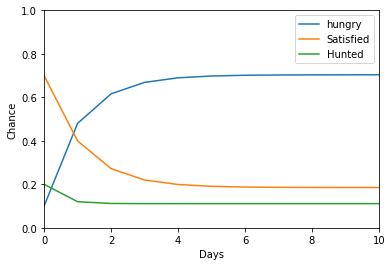

In [14]:
plot(flumphChances)

### Conclusie van 3 toestanden

Binnen de eerste 10 dagen stagneert de kansmatrix, hierdoor zijn er geen veranderingen meer in de kansen tot oneindigheid. De grootste kans blijft hierdoor hongerig.

## Flumph met 4 toestanden

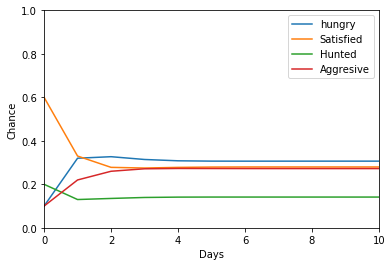

Starting at day 2 Flumph will most likely be hungry he/she has a 30.65% chance to be so.


In [15]:
matrix = [
    [0.5, 0.1, 0.1, 0.3], # Hongerig
    [0.4, 0.4, 0.1, 0.1], # Tevreden
    [0.1, 0.2, 0.2, 0.5], # Opgejaagd
    [0.1, 0.4, 0.2, 0.3]  # Agressief
]

newbornFlumphChances = [0.1, 0.6, 0.2, 0.1]
days = 10

flumphChances = calulcate_future(days, newbornFlumphChances, matrix)
plot(flumphChances)
final_state, chance, start_date = most_likely_state(flumphChances)

print('Starting at day '+ str(start_date) +' Flumph will most likely be ' + states[final_state] + ' he/she has a ' + str(round(chance * 100, 2)) + '% chance to be so.')

### Conclusie van 4 toestanden

Ook bij een Flumph met 4 toestanden stagneert de kans-matrix in de eerste 10 dagen. Hierdoor blijven de kansen gelijk tot in oneindigheid. De grootste kans blijft dat de Flump Hongerig is.

Door het toevoegen van de 4e toestand is er nu een veel lagere kans dat de flump hongerig is, en zijn de kansen een stuk gelijker geworden. Dit lijkt een goede toevoeging te zijn geweest.